#Install Turicreate

In [2]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 4.4 kB/s 
     |████████████████████████████████| 322 kB 42.4 MB/s 
     |████████████████████████████████| 3.5 MB 55.5 MB/s 
     |████████████████████████████████| 3.6 MB 47.5 MB/s 
     |████████████████████████████████| 86.4 MB 24 kB/s 
     |████████████████████████████████| 18.3 MB 76 kB/s 
     |████████████████████████████████| 3.8 MB 51.6 MB/s 
     |████████████████████████████████| 449 kB 52.5 MB/s 
     |████████████████████████████████| 2.9 MB 23.4 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=e433e7d8dc30a1c26cfbac37a2572d653f960a8cc04b6fd103ca208d17e41039
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=7310ae93fab

# Course 1

##Week 2 Assignment

In [ ]:
import turicreate as tc
sf = tc.SFrame("home_data.csv")

In [ ]:
houses = sf[sf['zipcode']==98039]

In [ ]:
houses.show()

In [ ]:
houses['price'].mean()

In [ ]:
cond = lambda x: x>2000 and x<=4000

In [ ]:
houses2 = sf[(sf['sqft_living'] > 2000) & (sf['sqft_living'] <= 4000)]

In [ ]:
houses2.shape[0]/sf.shape[0]

In [ ]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [ ]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
train,test = sf.random_split(.8,seed=0)
my_model = tc.linear_regression.create(train,target='price',features=my_features,validation_set=None)
advanced_model = tc.linear_regression.create(train,target='price',features=advanced_features,validation_set=None)

In [ ]:
my_model.evaluate(test)


In [ ]:
advanced_model.evaluate(test)

##Week 3 Assignment

In [ ]:
import turicreate as tc

In [ ]:
data = tc.SFrame('amazon_baby.csv')

Successfully parsed 2 tokens: 
	0: Built NY C ... Patrol Red
	1: I am a new ... really nic

1 lines failed to parse correctly

Finished parsing file /content/amazon_baby.csv

Parsing completed. Parsed 100 lines in 0.837914 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 2 tokens: 
	0: Built NY C ... Patrol Red
	1: "I am a ne ... really nic

1 lines failed to parse correctly

Finished parsing file /content/amazon_baby.csv

Parsing completed. Parsed 68021 lines in 1.34107 secs.

In [ ]:
data.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4


In [ ]:
data['word_count'] = tc.text_analytics.count_words(data['review'])

In [ ]:
data.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


In [ ]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [ ]:
def select_count(x,word):
  if word in x:
    return x[word]
  else:
    return 0

In [ ]:
for word in selected_words:
  data[word] = data['word_count'].apply(lambda x:select_count(x,word))

In [ ]:
for word in selected_words:
  print(word,':', data[word].min(),data[word].max(),data[word].sum())

awesome : 0.0 4.0 1287.0
great : 0.0 7.0 22367.0
fantastic : 0.0 3.0 637.0
amazing : 0.0 4.0 820.0
love : 0.0 39.0 14912.0
horrible : 0 4 577
bad : 0.0 4.0 2042.0
terrible : 0 3 534
awful : 0 4 317
wow : 0 3 184
hate : 0 5 568


In [ ]:
binary_sentiments=data[data['rating']!=3]
binary_sentiments['sentiment'] = binary_sentiments['rating']>=4
train_data,test_data = binary_sentiments.random_split(.8, seed=0)
bin_model=tc.logistic_classifier.create(train_data,target='sentiment',features=selected_words,validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 49405

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.118513     | 0.835442          | 0.832728            |

| 2         | 3        | 0.179295     | 0.836211          | 0.834503            |

| 3         | 4        | 0.240107     | 0.836211          | 0.834584            |

| 4         | 5        | 0.300839     | 0.836211          | 0.834584            |

| 5         | 6        | 0.361521     | 0.836211          | 0.834584            |

| 6         | 7        | 0.423736     | 0.836211          | 0.834584            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [ ]:
bin_model.evaluate(test_data,metric='accuracy')

{'accuracy': 0.8345840393770677}

In [ ]:
bin_model.coefficients.print_rows(12,5)


+-------------+-------+-------+---------------------+----------------------+
|     name    | index | class |        value        |        stderr        |
+-------------+-------+-------+---------------------+----------------------+
| (intercept) |  None |   1   |  1.2557034765744486 | 0.014286165921078214 |
|   awesome   |  None |   1   |  1.4011203919252804 |  0.1555816576183681  |
|    great    |  None |   1   |  0.8294132357201058 | 0.02923757383614713  |
|  fantastic  |  None |   1   |  0.9190934430249342 | 0.17991792461808426  |
|   amazing   |  None |   1   |  1.2536501280690444 | 0.18134806751248098  |
|     love    |  None |   1   |  1.4406435285005854 | 0.047334838852226065 |
|   horrible  |  None |   1   |  -2.237085381702423 | 0.11848342449334022  |
|     bad     |  None |   1   | -0.8660601329247748 | 0.05922522131535969  |
|   terrible  |  None |   1   | -2.3051809255813183 |  0.1185507457914301  |
|    awful    |  None |   1   |  -2.382520778902458 | 0.16531377733859026  |

In [ ]:
products=tc.SFrame('amazon_baby.csv')
products['word_count'] = tc.text_analytics.count_words(products['review'])
products=products[products['rating']!=3]
products['sentiment'] = products['rating']>=4
train_data,test_data = products.random_split(.8, seed=0)
old_model=tc.logistic_classifier.create(train_data,target='sentiment',features=['word_count'],validation_set=test_data)

Successfully parsed 2 tokens: 
	0: Built NY C ... Patrol Red
	1: I am a new ... really nic

1 lines failed to parse correctly

Finished parsing file /content/amazon_baby.csv

Parsing completed. Parsed 100 lines in 0.795846 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 2 tokens: 
	0: Built NY C ... Patrol Red
	1: "I am a ne ... really nic

1 lines failed to parse correctly

Finished parsing file /content/amazon_baby.csv

Parsing completed. Parsed 68021 lines in 0.680609 secs.

Logistic regression:

--------------------------------------------------------

Number of examples          : 49405

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 35632

Number of coefficients      : 35633

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.096279  | 0.709479     | 0.827588          | 0.828129            |

| 1         | 10       | 8.183755  | 1.516386     | 0.932254          | 0.898330            |

| 2         | 11       | 8.183755  | 1.779916     | 0.953588          | 0.911724            |

| 3         | 12       | 8.183755  | 2.045222     | 0.968323          | 0.899863            |

| 4         | 14       | 3.949770  | 2.454598     | 0.979982          | 0.898410            |

| 8         | 20       | 1.652765  | 3.768250     | 0.992936          | 0.890180            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [ ]:
old_model.evaluate(test_data,metric='accuracy')

{'accuracy': 0.8901799402888727}

In [ ]:
products['predicted_sentiment'] = old_model.predict(products, output_type = 'probability')
binary_sentiments['predicted_sentiment'] = bin_model.predict(products, output_type = 'probability')
diaper_champ_reviews_new = binary_sentiments[binary_sentiments['name']=='Baby Trend Diaper Champ']
diaper_champ_reviews_old = products[binary_sentiments['name']=='Baby Trend Diaper Champ']

In [ ]:
diaper_champ_reviews_new = diaper_champ_reviews_new.sort('predicted_sentiment', ascending=False)
diaper_champ_reviews_old = diaper_champ_reviews_old.sort('predicted_sentiment', ascending=False)

In [ ]:
diaper_champ_reviews_new[0:1]


Columns:
	name	str
	review	str
	rating	int
	word_count	dict
	awesome	float
	great	float
	fantastic	float
	amazing	float
	love	float
	horrible	int
	bad	float
	terrible	int
	awful	int
	wow	int
	hate	int
	sentiment	int
	predicted_sentiment	float

Rows: 1

Data:
+-------------------------+-------------------------------+--------+
|           name          |             review            | rating |
+-------------------------+-------------------------------+--------+
| Baby Trend Diaper Champ | As a Mother of 9 month old... |   5    |
+-------------------------+-------------------------------+--------+
+-------------------------------+---------+-------+-----------+---------+------+
|           word_count          | awesome | great | fantastic | amazing | love |
+-------------------------------+---------+-------+-----------+---------+------+
| {'this': 1.0, 'specific': ... |   0.0   |  0.0  |    0.0    |   0.0   | 1.0  |
+-------------------------------+---------+-------+-----------+---------+------+
+----------+-----+----------+-------+-----+------+-----------+
| horrible | bad | terrible | awful | wow | hate | sentiment |
+----------+-----+----------+-------+-----+------+-----------+
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
+----------+-----+----------+-------+-----+------+-----------+
+---------------------+
| predicted_sentiment |
+---------------------+
|  0.8624739035825635 |
+---------------------+
[1 rows x 17 columns]

In [ ]:
diaper_champ_reviews_new[0:1]['review']

dtype: str
Rows: 1
["As a Mother of 9 month old twins, I go through plenty of diapers.  We're moving to the U.K. in a couple of weeks, and after not being able to find a 'Champ' anywhere overseas, I'm having one shipped to our new home.  We've never had a problem with smell, or operation, and love that we can use the bags we choose and not be tied down to brand-specific refill bags.  I highly recommend this product to anyone!"]

In [ ]:
diaper_champ_reviews_old[0:1]


Columns:
	name	str
	review	str
	rating	int
	word_count	dict
	sentiment	int
	predicted_sentiment	float

Rows: 1

Data:
+-------------------------+-------------------------------+--------+
|           name          |             review            | rating |
+-------------------------+-------------------------------+--------+
| Baby Trend Diaper Champ | I have never written a rev... |   5    |
+-------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------------------+
|           word_count          | sentiment | predicted_sentiment |
+-------------------------------+-----------+---------------------+
| {'priceless': 1.0, 'knows'... |     1     |  0.9999999999999827 |
+-------------------------------+-----------+---------------------+
[1 rows x 6 columns]

In [ ]:
diaper_champ_reviews_old[0:1]['review']

dtype: str
Rows: 1
['I have never written a review for Amazon but I saw some of the poor reviews on the Diaper Champ and had to add my two cents . . .When my sister got pregnant she could not decide if she should register for the Diaper Champ or the Diaper Genie.  She left it up to me and after reviewing both items I went with the Diaper Champ . . .  The idea of having to continually purchase bags for the Diaper Genie seemed like a waste when the Diaper Champ lets you use any type of bag . . .  My nephew is now over two years old and while he has begun potty training, my sister still uses the Diaper Champ I gave her . . .When it came time for me to choose a diaper disposal system, I put the Diaper Champ on my registry.  Yes, it can be a bit tricky to open (I found using two hands works best) but then again do I want something that is holding wet and otherwise dirty diapers to open easily?  True, the mechanism sometimes won\'t "swing" the dirty diaper into the pail but HELLO that is a s

In [ ]:
positive_sents = products[products['sentiment']==1].num_rows()
negative_sents= products[products['sentiment']==0].num_rows()

print(int(positive_sents)/products.num_rows())
print(int(negative_sents)/products.num_rows())

0.8276319621994239
0.17236803780057608


##Week 4 Assignment

In [ ]:
people_data = tc.SFrame('people_wiki.csv')
people_data['word_count'] = tc.text_analytics.count_words(people_data['text'])
people_data['tfidf'] = tc.text_analytics.tf_idf(people_data['text'])

Finished parsing file /content/people_wiki.csv

Parsing completed. Parsed 100 lines in 1.47896 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 26690 lines. Lines per second: 16878.1

Finished parsing file /content/people_wiki.csv

Parsing completed. Parsed 59071 lines in 2.13582 secs.

In [ ]:
elton_john = people_data[people_data['name']=='Elton John']
elton_john[['word_count']].stack('word_count',new_column_name=['word','word_count']).sort('word_count',ascending=False)


word,word_count
the,27.0
in,18.0
and,15.0
of,13.0
a,10.0
has,9.0
he,7.0
john,7.0
on,6.0
since,5.0


In [ ]:
elton_john[['tfidf']].stack('tfidf',new_column_name=['word','tfidf']).sort('tfidf',ascending=False)

word,tfidf
furnish,18.95699105823948
elton,17.562463788430126
billboard,17.153281284765626
john,13.954956720810552
songwriters,11.193863462352606
aids,10.295524377666819
taupin,10.171642709679686
fivedecade,10.171642709679686
overallelton,10.171642709679686
tonightcandle,10.171642709679686


In [ ]:
victoria_beckham = people_data[people_data['name']=='Victoria Beckham']
paul_mccartney = people_data[people_data['name']=='Paul McCartney']

In [ ]:
elton_john

URI,name,text,word_count,tfidf
<http://dbpedia.org/resource/Elton_John> ...,Elton John,sir elton hercules johncbe born reginald ken ...,"{'movements': 1.0,'social': 1.0, ...","{'movements':4.995492977105856, ..."


In [ ]:
elton_john['tfidf']

dtype: dict
Rows: ?
[{'movements': 4.995492977105856, 'social': 2.65575362446456, 'champion': 3.1461043950411653, 'wed': 6.77044532801753, 'legal': 3.39856233402415, 'became': 1.3255775189868049, 'after': 0.9355371298174766, '2005': 1.6510552851954328, 'december': 3.9553793722318864, 'furnish': 18.95699105823948, '1988': 2.4863991017038525, 'gay': 8.74510011043832, 'openly': 5.0068567357561715, '1976': 2.7462848226525343, 'bisexual': 6.913546171658203, '200': 3.8472837472983747, 'raised': 3.073267071088899, 'industry': 2.9403557053520704, 'film': 2.0483813905579398, 'hollywood': 3.9178138981042125, 'parties': 4.484667353339866, 'become': 2.4919290697133136, 'which': 0.7688654471684553, 'hosting': 4.787147646890597, 'year': 1.3454953105361276, 'established': 3.069143353905037, '1992': 2.276579211588113, '1980s': 2.96452385347193, 'lgbt': 5.6498541326306455, 'against': 2.0077017549246783, 'involved': 2.6839089482432414, '2014': 2.1957343495141477, 'entered': 3.31307767488832, '2012he': 6

In [ ]:
victoria_beckham['tfidf']

dtype: dict
Rows: ?
[{'week': 3.57252509903475, 'york': 1.701047544762206, 'show': 2.1689013529494012, 'ticket': 5.142950972193835, 'now': 1.96695239252401, 'pack': 5.868501576808439, 'who': 0.9098952189804214, 'won': 1.3836400683164753, 'significant': 3.7624705809393637, 'saying': 4.093853748053105, 'most': 1.4186204428983973, 'than': 2.0650378102773113, 'successful': 2.679282762596886, 'more': 1.673778950632145, 'from': 0.29375533798563447, 'transition': 4.721194176487485, 'that': 0.6614069466714981, 'white': 3.1974549875677174, 'over': 1.4878231559557336, 'daily': 3.536415819417696, 'scathing': 7.990763115671204, 'predicted': 6.259107570512853, 'writing': 2.61409678271219, 'star': 2.9854754279015427, '2012': 1.7938099524877322, 'year': 1.3423616371539895, 'brand': 8.994580915799753, 'performer': 4.073752568732018, 'named': 2.0300155412252816, 'launched': 3.594463821710603, 'brands': 5.355283607403829, 'highprofile': 5.38807343022682, 'following': 3.9218391113882123, 'icon': 5.433535

In [ ]:
people_data

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'melbourne': 1.0,'parade': 1.0, ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'time': 1.0, 'each':1.0, 'hour': 1.0, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'society': 1.0,'hamilton': 1.0, 'to': ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'kurdlawitzpreis': 1.0,'awarded': 1.0, '2004': ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'curtis': 1.0, '2007':1.0, 'cent': 1.0, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'asses': 1.0, 'sic':1.0, 'toilets': 1.0, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'streamz': 1.0,'including': 1.0, ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'concordia': 1.0,'creative': 1.0, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'heavies': 1.0, 'new':1.0, 'brand': 1.0, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'2002': 1.0, 'harvard':1.0, 'twentieth': 1.0, ..."


In [ ]:
tc.distances.cosine(elton_john['tfidf'][0],victoria_beckham['tfidf'][0])

0.9565813435491453

In [ ]:
tc.distances.cosine(elton_john['tfidf'][0],paul_mccartney['tfidf'][0])

0.8247147402279491

In [ ]:
knn_model_tfidf = tc.nearest_neighbors.create(people_data,features=['tfidf'],label='name',distance='cosine')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
knn_model_wordcount = tc.nearest_neighbors.create(people_data,features=['word_count'],label='name',distance='cosine')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
knn_model_tfidf.query(elton_john)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 22.793ms     |

| Done         |         | 100         | 509.154ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,0.0002981511654026603,1
0,Rod Stewart,0.7168225898091106,2
0,Sting (musician),0.7470057316092684,3
0,George Michael,0.7477159258187809,4
0,Phil Collins,0.7511962991984571,5


In [ ]:
knn_model_wordcount.query(elton_john)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 21.293ms     |

| Done         |         | 100         | 474.975ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,2.220446049250313e-16,1
0,Cliff Richard,0.16142415258967036,2
0,Sandro Petrone,0.16822542751041114,3
0,Rod Stewart,0.16832716558706107,4
0,Malachi O'Doherty,0.177315545978884,5


In [ ]:
knn_model_tfidf.query(victoria_beckham)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 22.578ms     |

| Done         |         | 100         | 507.433ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,1.1102230246251565e-16,1
0,David Beckham,0.5481696102632145,2
0,Stephen Dow Beckham,0.7849867068283364,3
0,Mel B,0.8095855234085036,4
0,Caroline Rush,0.81982642291868,5


In [ ]:
knn_model_wordcount.query(victoria_beckham)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 14.274ms     |

| Done         |         | 100         | 502.97ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,-2.220446049250313e-16,1
0,Mary Fitzgerald (artist),0.20730703611504997,2
0,Adrienne Corri,0.21450978278754795,3
0,Beverly Jane Fry,0.21746646874079278,4
0,Raman Mundair,0.21769547499150488,5


##Week 5 Assignment

In [ ]:
import turicreate as tc

In [ ]:
song_data = tc.SFrame('song_data.csv')

Finished parsing file /content/song_data.csv

Parsing completed. Parsed 100 lines in 2.22079 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 374317 lines. Lines per second: 156333

Successfully parsed 4 tokens: 
	0: 49b4c5f439 ... 999cf31a60
	1: SOMJLKL12AF72A4508
	2: 3
	3: "I\

1 lines failed to parse correctly

Finished parsing file /content/song_data.csv

Parsing completed. Parsed 1055542 lines in 3.69298 secs.

In [ ]:
song_data.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


In [ ]:
kanye_songs = song_data[song_data['artist']=='Kanye West']
foo_songs = song_data[song_data['artist']=='Foo Fighters']
swift_songs = song_data[song_data['artist']=='Taylor Swift']
gaga_songs = song_data[song_data['artist']=='Lady GaGa']

In [ ]:
gaga_songs

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
4bd88bfb25263a75bbdd467e74018f4ae570e5df ...,SOXGQEM12AB0181D35,12,Speechless,Lady GaGa
a5cc4c1c78e830b43bba70a8d439ad865ca8026f ...,SOSCIZP12AB0181D2F,5,Alejandro,Lady GaGa
8cbb5066924ec788e3fea9a4aae59586f46f38fa ...,SOASXQD12AB018902F,1,Beautiful_ Dirty_ Rich,Lady GaGa
8cbb5066924ec788e3fea9a4aae59586f46f38fa ...,SOCBQKE12AB018548E,1,Teeth,Lady GaGa
8cbb5066924ec788e3fea9a4aae59586f46f38fa ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
8cbb5066924ec788e3fea9a4aae59586f46f38fa ...,SOEYVHS12AB0181D31,1,Monster,Lady GaGa
8cbb5066924ec788e3fea9a4aae59586f46f38fa ...,SOJVYJH12AB0180F4F,1,Disco Heaven,Lady GaGa
8cbb5066924ec788e3fea9a4aae59586f46f38fa ...,SOMONAP12AB0181D21,1,Again Again,Lady GaGa
8cbb5066924ec788e3fea9a4aae59586f46f38fa ...,SOSCIZP12AB0181D2F,1,Alejandro,Lady GaGa


In [ ]:
kanye_unique = kanye_songs['user_id'].unique()
foo_unique = foo_songs['user_id'].unique()
swift_unique = swift_songs['user_id'].unique()
gaga_unique = gaga_songs['user_id'].unique()

In [ ]:
kanye_unique.value_counts

<bound method SArray.value_counts of dtype: str
Rows: 2389
['900ed526660df9c3442ebe736db94eb0bc251b73', '5c604b6fc3d4077dfca40a57eea49388b69a19d6', 'b4c75391d49ce797c1af18468f1aa3ae5943f9de', '18325842a941bc58449ee71d659a08d1c1bd2383', '9685135efd0757150edb8d49e192fbb301e70e94', '71c17371dff96abe86663a7dc83e4334f3e4a67f', '9f78f038854c3ffb9e864ad281a7201d4dd999b2', 'b8474ad076d711b04a8732baab59872e72b487ff', 'd98c7abec08395694f7e469a8780d5cb54c809ba', 'b82c94bab6013453c2a0618f2079dff7c74599f0', '8c1022e54b28810ca20abb601328f1105f025125', '3abef8c80a5c697fcf7da4495bef26899ed13c77', 'c4f5e1f732f7ee646b58045d23643243abb561de', 'a90a12b1d303da46ecb3f77b8efd0d03370a9e86', 'e0c4690cbdd89e8817e7a25bce072b1ddc9618a5', '4c7f3dcad92dcb7e625aeb61e3b79d2fdffccc93', '744c384772ec76b403094d3ee97d2d6e07d3e0c3', 'ac76f1fb38d2c9c27178cccc502c2be2cc5b9acf', '82c458f2e9bc30f87890b408e5b965114989edf4', '37b97745b5649ca367aab9e4999528b470ecc692', 'd6dbb0578fe5baf513cad07fbf07801f89fd9313', '99d724639a1e51f

In [ ]:
foo_unique.value_counts

<bound method SArray.value_counts of dtype: str
Rows: 1939
['dc4a6ab83084f5f1c858793fa22f1200d5b6c267', '83b1428917b47a6b130ed471b09033820be78a8c', '5c9f68452a0a591d1fa7987bf2465fa646b99788', 'fc1b68dc9b3f0dd8752dd27cf5abc72993d6f81b', 'd98c7abec08395694f7e469a8780d5cb54c809ba', '4a3a1ae2748f12f7ab921a47d6d79abf82e3e325', '73453446c77ec6d9f01804dd94b4548a1680e828', 'e70c4dd69296c7c57f64feb49a4a2a19bf3f688e', '66515166dc465cb51af511db9f6e708095af31a6', '632af0475de5f2d90838520df96e4b681a383114', '9e47dcebaa4af46b192ff8cc1b5133b1d93fcce5', 'b41053464974bb6df6cabd2dd7a66039f182e9cb', 'd95df4df9d6f25e76f13556ce6cf5b50f979c76c', '2cc3314f90b8a3206a1ff3982d9195244f0504f0', 'd0e43e3058cbd5a55ab57b5d367b154c35650419', '13239e5c03b7cb15ed6a2007920f2e5d36466af2', 'b919f662b26957782fa1ea3543438edf53489ec7', '8a4dda75f8f820852dccd878ae2f725fd54d947d', 'c8529f95b292bad3a1d6ecaaa36f1d102b24598f', 'ca51216616cf1953ee93db8c54188a1eea1d5e6f', 'dbc6b70d02051fa6925fe7827be3316543c10537', 'f6255ef4f5df81d

In [ ]:
swift_unique.value_counts

<bound method SArray.value_counts of dtype: str
Rows: 3072
['02f015d32ac2cd1e52d26e3ec36048711dd5711b', '968f1baebc490d3c6999ee6c85c5cab8b726b347', '8a8eb87dc4de1a671451e4f6745739c77b97c202', '360b4499ebb6a98afbcfe95377ff8709eb95faac', 'b8474ad076d711b04a8732baab59872e72b487ff', 'd99ead40aad574d76c8c1121d0a0b3420987ab2a', '62c4bf887b7b1e5cf6ab62723481099c7f98377e', 'b7b5408ba99a68a4d8d9df6007e8516a8fabb43f', '92337c69d4ff1c13f5c9ad4e9c62a0654be9d230', 'e8813fe73c90d69b4f744251c68fce896ec2aede', '73b81196e7429ef73636704acf70fa5cb22e0294', 'a558facade7c856f056b13692c348ad22c624633', 'affe67dcd8452def0784688df632cbf53b4c66c6', 'b82c94bab6013453c2a0618f2079dff7c74599f0', '7906b560bae5f8b3eb5d7f78ae65dbe94f248f4d', '02a898aab6609c477535af8a92036687d17b75c7', 'd6dbb0578fe5baf513cad07fbf07801f89fd9313', '5d55e0bebd46ac419e4e0fbacfee57602fe8cc1f', '08698dcb702ef3b79c57ab3027e6e3db8a6df526', '1c765481d4103de594ce8292b199cf7ce5aaf696', '56dd181814f67cac489d51c5828f2905c165db47', '9232eeaa942af2f

In [ ]:
gaga_unique.value_counts

<bound method SArray.value_counts of dtype: str
Rows: 2771
['0ecb1f480ebb237dc7821c898c94219cdfe38789', '7ad06615d118067e1bf973aa86c672874e0eb78f', 'b2b08a84654f90585e0dc3c5155d330fb8e4ba59', '360b4499ebb6a98afbcfe95377ff8709eb95faac', '2e9cbd200d67910aeb97b36efe9cd4341cc06030', 'fe85b96ba1983219b296f6b4869dd29eb2b72ff9', 'b0a570c42ba00edff4804f5d63916021ecfbd23c', 'e132e16e64f99edc3a674f823ce241da8dfbda21', '6b17deda6a5e5f22005e3aebc007e74c2574c7df', 'e8813fe73c90d69b4f744251c68fce896ec2aede', '090e635812d596bd980db8abc8226413441d8144', 'e70c4dd69296c7c57f64feb49a4a2a19bf3f688e', '38b77950a0d776effcdd6a7c101cc4d008059885', '3cea6c2878acf2f2996f98424d7f656adfaa2f6a', '7906b560bae5f8b3eb5d7f78ae65dbe94f248f4d', 'de5b7f935683035a6cde7f5886254fd293a73869', '531bbf65b9fd21d4e56d837def9399f304691207', '181d9c254ff957a396b8bbcec10228f84cfa5c2c', 'ad3e5d8acd955dd709794043e7ae02a85df12d65', 'efad1bd178aa3996d6fd40412ca0e5af4794e983', '3a829c9fa2a7b69f4067260200d35cc1af84020d', '5c4632b90bed9b1

In [ ]:
total = song_data.groupby('artist', {'total_count': tc.aggregate.SUM('listen_count')})
total.sort('total_count',ascending=False)

artist,total_count
Kings Of Leon,41004
Dwight Yoakam,38411
Björk,36507
Coldplay,33474
Florence + The Machine,31713
Justin Bieber,28042
Alliance Ethnik,25584
OneRepublic,24230
Train,24035
The Black Keys,20927


In [ ]:
total.sort('total_count',ascending=True)

artist,total_count
William Tabbert,13
Reel Feelings,19
Beyoncé feat. Bun B andSlim Thug ...,25
Diplo,29
Boggle Karaoke,30
harvey summers,30
Nâdiya,35
Deadmau 5,36
Jody Bernal,37
Aneta Langerova,37


In [ ]:
train_data,test_data = song_data.random_split(.8,seed=0)
personalized_model = tc.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')
subset_test_users = test_data['user_id'].unique()[0:10000]
recom = personalized_model.recommend(subset_test_users,k=1)


Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 844857 observations with 62513 users and 9952 items.

Data prepared in: 1.47683s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.313ms                        | 1.5        |

| 52.56ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 640.499ms                           | 0                | 1               |

| 2.42s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 3.50393s

recommendations finished on 1000/10000 queries. users per second: 3365.41

recommendations finished on 2000/10000 queries. users per second: 3399.26

recommendations finished on 3000/10000 queries. users per second: 3364.79

recommendations finished on 4000/10000 queries. users per second: 3344.14

recommendations finished on 5000/10000 queries. users per second: 3353.05

recommendations finished on 6000/10000 queries. users per second: 3358.5

recommendations finished on 7000/10000 queries. users per second: 3309.29

recommendations finished on 8000/10000 queries. users per second: 3277.48

recommendations finished on 9000/10000 queries. users per second: 3258.86

recommendations finished on 10000/10000 queries. users per second: 3238.97

In [ ]:
count_recom = recom.groupby('song', {'count': tc.aggregate.COUNT()})
count_recom.sort('count',ascending=False)

song,count
Undo - Björk,428
Secrets - OneRepublic,395
Revelry - Kings Of Leon,222
You're The One - DwightYoakam ...,155
Hey_ Soul Sister - Train,129
Sehr kosmisch - Harmonia,109
Fireflies - CharttraxxKaraoke ...,103
Horn Concerto No. 4 in Eflat K495: II. Romance ...,82
OMG - Usher featuringwill.i.am ...,71
Dog Days Are Over (RadioEdit) - Florence + The ...,52


##Week 6

In [ ]:
import turicreate as tc
image_train = tc.SFrame('image_train_data.csv')
image_test = tc.SFrame('image_test_data.csv')


Finished parsing file /content/image_train_data.csv

Parsing completed. Parsed 100 lines in 1.64555 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,array,array]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 1943 lines. Lines per second: 1014.9

Finished parsing file /content/image_train_data.csv

Parsing completed. Parsed 2005 lines in 1.94137 secs.

Finished parsing file /content/image_test_data.csv

Parsing completed. Parsed 100 lines in 1.61323 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,array,array]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 3883 lines. Lines per second: 1169.15

Finished parsing file /content/image_test_data.csv

Parsing completed. Parsed 4000 lines in 3.37086 secs.

In [ ]:
sketch = tc.Sketch(image_train['label'])

In [ ]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [ ]:
dog_data = image_train[image_train['label']=='dog']
cat_data = image_train[image_train['label']=='cat']
bird_data = image_train[image_train['label']=='bird']
car_data = image_train[image_train['label']=='automobile']

In [ ]:
dog_model = tc.nearest_neighbors.create(dog_data,features = ['deep_features'])
cat_model = tc.nearest_neighbors.create(cat_data,features = ['deep_features'])
bird_model = tc.nearest_neighbors.create(bird_data,features = ['deep_features'])
car_model = tc.nearest_neighbors.create(car_data,features = ['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
cat_test = image_test[0:1]
cat_test['image_array'].explore()

,SArray
0,"[158.0, 112.0, 49.0, 159.0, 111.0, 47.0, 165.0, 116.0, 51.0, 166.0, 118.0, 53.0, 160.0, 112.0, 46.0, 156.0, 109.0, 41.0, 162.0, 115.0, 47.0, 159.0, 113.0, 45.0, 158.0, 111.0, 44.0, 159.0, 113.0, 41.0, 161.0, 116.0, 41.0, 160.0, 111.0, 52.0, 161.0, 111.0, 49.0, 166.0, 117.0, 41.0, 169.0, 117.0, 45.0, 170.0, 119.0, 44.0, 167.0, 117.0, 40.0, 162.0, 113.0, 38.0, 160.0, 111.0, 39.0, 160.0, 112.0, 43.0, 156.0, 109.0, 44.0, 149.0, 107.0, 45.0, 150.0, 107.0, 45.0, 148.0, 106.0, 43.0, 149.0, 107.0, 44.0, 143.0, 101.0, 39.0, 140.0, 98.0, 43.0, 141.0, 97.0, 41.0, 143.0, 97.0, 38.0, 137.0, 95.0, 36.0, 126.0, 91.0, 36.0, 116.0, 85.0, 33.0, 152.0, 112.0, 51.0, 151.0, ...]"


In [ ]:
dog_model.query(cat_test)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 27.086ms     |

| Done         |         | 100         | 94.543ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,159,37.464261499032624,1
0,129,37.56668346505196,2
0,362,37.604727063207264,3
0,445,37.70655875275332,4
0,67,38.5113288876023,5


In [ ]:
cat_model.query(cat_test)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 20.287ms     |

| Done         |         | 100         | 90.688ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,181,34.62372239472129,1
0,467,36.006879949937115,2
0,323,36.52008095832401,3
0,269,36.75484798105772,4
0,3,36.87311532755401,5


In [ ]:
dog_tests = image_test[image_test['label']=='dog']
cat_tests = image_test[image_test['label']=='cat']
bird_tests = image_test[image_test['label']=='bird']
car_tests = image_test[image_test['label']=='automobile']

In [ ]:
dog_cat_neighbors = cat_model.query(dog_tests, k=1)
dog_car_neighbors = car_model.query(dog_tests, k=1)
dog_bird_neighbors = bird_model.query(dog_tests, k=1)
dog_dog_neighbors = dog_model.query(dog_tests,k=1)

cat_dog_neighbors = dog_model.query(cat_tests, k=1)
cat_car_neighbors = car_model.query(cat_tests, k=1)
cat_bird_neighbors = bird_model.query(cat_tests, k=1)
cat_cat_neighbors = cat_model.query(cat_tests, k=1)

car_dog_neighbors = dog_model.query(car_tests, k=1)
car_car_neighbors = car_model.query(car_tests, k=1)
car_bird_neighbors = bird_model.query(car_tests, k=1)
car_cat_neighbors = cat_model.query(car_tests, k=1)

bird_cat_neighbors = cat_model.query(bird_tests, k=1)
bird_car_neighbors = car_model.query(bird_tests, k=1)
bird_dog_neighbors = dog_model.query(bird_tests, k=1)
bird_bird_neighbors = bird_model.query(bird_tests, k=1)


Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 738.565ms    |

| Done         | 509000  | 100         | 756.025ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 742.702ms    |

| Done         | 509000  | 100         | 760.063ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 664.191ms    |

| Done         | 478000  | 100         | 717.164ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 728.744ms    |

| Done         | 509000  | 100         | 751.659ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 756.88ms     |

| Done         | 509000  | 100         | 764.236ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 737.795ms    |

| Done         | 509000  | 100         | 745.209ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 714.47ms     |

| Done         | 478000  | 100         | 716.923ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 725.585ms    |

| Done         | 509000  | 100         | 732.563ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 729.153ms    |

| Done         | 509000  | 100         | 736.522ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 743.767ms    |

| Done         | 509000  | 100         | 748.51ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 705.948ms    |

| Done         | 478000  | 100         | 710.552ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 716.203ms    |

| Done         | 509000  | 100         | 719.605ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 759.182ms    |

| Done         | 509000  | 100         | 781.477ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 729.685ms    |

| Done         | 509000  | 100         | 744.167ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 737.29ms     |

| Done         | 509000  | 100         | 740.809ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 692.628ms    |

| Done         | 478000  | 100         | 702.931ms    |

+--------------+---------+-------------+--------------+

In [ ]:
dog_distances = tc.SFrame({'dog-car':dog_car_neighbors['distance'],
                           'dog-cat':dog_cat_neighbors['distance'],
                           'dog-bird':dog_bird_neighbors['distance'],
                           'dog-dog':dog_dog_neighbors['distance']})

car_distances = tc.SFrame({'car-car':car_car_neighbors['distance'],
                           'car-cat':car_cat_neighbors['distance'],
                           'car-bird':car_bird_neighbors['distance'],
                           'car-dog':car_dog_neighbors['distance']})

cat_distances = tc.SFrame({'cat-car':cat_car_neighbors['distance'],
                           'cat-cat':cat_cat_neighbors['distance'],
                           'cat-bird':cat_bird_neighbors['distance'],
                           'cat-dog':cat_dog_neighbors['distance']})

bird_distances = tc.SFrame({'bird-car':bird_car_neighbors['distance'],
                           'bird-cat':bird_cat_neighbors['distance'],
                           'bird-bird':bird_bird_neighbors['distance'],
                           'bird-dog':bird_dog_neighbors['distance']})

In [ ]:
def is_correct(x,name_str):
  list = ['cat','dog','car','bird']
  for item in list:
    if (item!=name_str):
      if(x[name_str+'-'+name_str]>x[name_str+'-'+item]):
        return 0
  return 1


In [ ]:
cat_distances

cat-bird,cat-car,cat-cat,cat-dog
41.753862657220424,41.95798179425519,36.4196034322411,33.477353624727165
41.338292369111734,46.00213465392506,38.83532565622547,32.84584944831704
38.615760847020375,42.946230694978254,36.97633927904296,35.0397069097138
37.08922245285853,41.68660442162122,34.575005304479994,33.90103164931705
38.27229058597756,39.22697261698095,34.77882715084176,37.48492849819714
39.146212479503355,40.584514488610935,35.11715833132802,34.94516778579788
40.52304301510964,45.10673301502065,40.609582499299975,39.095728248324626
38.194793583068495,41.32211340706584,39.903686295242686,37.76961123755984
40.1567116178275,41.824473858456926,38.067468798784176,35.10891645030178
45.55979613336927,45.49769751482456,42.72587557167579,43.24228658778646


In [ ]:
dog_distances.apply(lambda x:is_correct(x,'dog')).sum()

678

In [ ]:
dog_distances.num_rows

<bound method SFrame.num_rows of Columns:
	dog-bird	float
	dog-car	float
	dog-cat	float
	dog-dog	float

Rows: 1000

Data:
+--------------------+--------------------+--------------------+
|      dog-bird      |      dog-car       |      dog-cat       |
+--------------------+--------------------+--------------------+
| 41.753862657220424 | 41.95798179425519  |  36.4196034322411  |
| 41.338292369111734 | 46.00213465392506  | 38.83532565622547  |
| 38.615760847020375 | 42.946230694978254 | 36.97633927904296  |
| 37.08922245285853  | 41.68660442162122  | 34.575005304479994 |
| 38.27229058597756  | 39.22697261698095  | 34.77882715084176  |
| 39.146212479503355 | 40.584514488610935 | 35.11715833132802  |
| 40.52304301510964  | 45.10673301502065  | 40.609582499299975 |
| 38.194793583068495 | 41.32211340706584  | 39.903686295242686 |
|  40.1567116178275  | 41.824473858456926 | 38.067468798784176 |
| 45.55979613336927  | 45.49769751482456  | 42.72587557167579  |
+--------------------+-----------

In [ ]:
cat_distances.apply(lambda x:is_correct(x,'cat')).sum()

548

#Course 2

##Week 1

In [ ]:
import turicreate as tc

In [ ]:
sales = tc.SFrame('kc_house_data.csv')

Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.161517 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.118205 secs.

In [ ]:
train_data,test_data = sales.random_split(.8,seed=0)

In [ ]:
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    sum_x= input_feature.sum()
    sum_y = output.sum()
    # compute the product of the output and the input_feature and its sum
    xy = input_feature*output
    sum_xy = xy.sum()
    # compute the squared value of the input_feature and its sum
    x_sq = input_feature*input_feature
    sum_x_sq = x_sq.sum()
    # use the formula for the slope
    slope = (sum_xy-(sum_x*sum_y/(len(output))))/(sum_x_sq-((sum_x*sum_x)/(len(output))))
    # use the formula for the intercept
    intercept = (sum_y/len(output)) - (slope*(sum_x/len(output)))
    return (intercept, slope)

In [ ]:
test_feature = tc.SArray(range(5))
test_output = tc.SArray(1 + 1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print ("Intercept: " + str(test_intercept))
print ("Slope: " + str(test_slope))

Intercept: 1.0
Slope: 1.0


In [ ]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

print("Intercept: " + str(sqft_intercept))
print("Slope: " + str(sqft_slope))

Intercept: -47116.07907289418
Slope: 281.9588396303426


In [ ]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = slope*input_feature + intercept
    
    return predicted_values

In [ ]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.85


In [ ]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    prediction = get_regression_predictions(input_feature, intercept, slope)

    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals=output-prediction

    # square the residuals and add them up
    res_sq = residuals*residuals
    RSS = res_sq.sum()

    return(RSS)

In [ ]:
print(get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope) )# should be 0.0

0.0


In [ ]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 1201918354177280.5


In [ ]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature =(output - intercept)/slope
    return estimated_feature

In [ ]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


In [ ]:
bed_intercept, bed_slope = simple_linear_regression(train_data['bedrooms'], train_data['bedrooms'])


In [ ]:
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))
rss_prices_on_bed = get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'], bed_intercept, bed_slope)
print('The RSS of predicting Prices based on Bedrooms is : ' + str(rss_prices_on_bed))

The RSS of predicting Prices based on Square Feet is : 275402933617811.72
The RSS of predicting Prices based on Bedrooms is : 1784256869563295.0


##Week 2 - 1

In [ ]:
example_features = ['sqft_living', 'bedrooms', 'bathrooms']
example_model = tc.linear_regression.create(train_data, target = 'price', features = example_features, 
                                                    validation_set = None)
example_weight_summary = example_model.coefficients
print(example_weight_summary)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.007862     | 4146407.590959     | 258679.804259                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+--------------------+--------------------+
|     name    | index |       value        |       stderr       |
+-------------+-------+--------------------+--------------------+
| (intercept) |  None |  87910.0692067843  | 7873.3381367552465 |
| sqft_living |  None | 315.40344111810253 | 3.455700322937548  |
|   bedrooms  |  None | -65080.21544162363 | 2717.4568521267106 |
|  bathrooms  |  None | 6944.020876312347  | 3923.114928129728  |
+-------------+-------+--------------------+--------------------+
[4 rows x 4 columns]



In [ ]:
example_predictions = example_model.predict(train_data)
print(example_predictions[0] )# should be 271789.50587

271789.50427758676


In [ ]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    pred = model.predict(data)
    # Then compute the residuals/errors
    res = pred - outcome
    # Then square and add them up
    res_sq = res*res
    RSS = res_sq.sum()
    return(RSS)   

In [ ]:
rss_example_train = get_residual_sum_of_squares(example_model, test_data, test_data['price'])
print(rss_example_train) # should be 2.7376153833e+14

273761534465419.5


In [ ]:
from math import log
train_data['bedrooms_squared'] = train_data['bedrooms'].apply(lambda x: x**2)
test_data['bedrooms_squared'] = test_data['bedrooms'].apply(lambda x: x**2)

train_data['bedrooms_bathrooms'] = train_data['bedrooms']*train_data['bathrooms']
test_data['bedrooms_bathrooms'] = test_data['bedrooms']*test_data['bathrooms']

train_data['log_sqft_living'] = train_data['sqft_living'].apply(lambda x: log(x))
test_data['log_sqft_living'] = test_data['sqft_living'].apply(lambda x: log(x))

train_data['lat_plus_long'] = train_data['lat'] + train_data['long']
test_data['lat_plus_long'] = test_data['lat'] + test_data['long']

In [ ]:
print(test_data['bedrooms_squared'].mean())
print(test_data['bedrooms_bathrooms'].mean())
print(test_data['log_sqft_living'].mean())
print(test_data['lat_plus_long'].mean())

12.4466777015843
7.503901631591395
7.550274679645938
-74.65333355403172


In [ ]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bedrooms_bathrooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

In [ ]:
model_1 = tc.linear_regression.create(train_data, target = 'price', features =model_1_features, 
                                                    validation_set = None)

model_2 = tc.linear_regression.create(train_data, target = 'price', features = model_2_features, 
                                                    validation_set = None)

model_3 = tc.linear_regression.create(train_data, target = 'price', features = model_3_features, 
                                                    validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 6

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.025051     | 4074792.266542     | 236378.065704                   |

| 2         | 3        | 0.056256     | 4074792.266501     | 236378.065703                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.017184     | 4014053.068781     | 235190.383244                   |

| 2         | 3        | 0.045102     | 4014053.068757     | 235190.383243                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 9

Number of unpacked features : 9

Number of coefficients    : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.029991     | 3193116.484469     | 228199.723038                   |

| 2         | 3        | 0.060451     | 3193116.484452     | 228199.723038                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
model_1.coefficients

name,index,value,stderr
(intercept),None,-56141852.464351855,1649928.358041933
sqft_living,None,310.26350672301453,3.188820623276094
bedrooms,None,-59577.60521214533,2487.274558462054
bathrooms,None,13812.406875959747,3593.5344057247753
lat,None,629863.1199344366,13120.68866986815
long,None,-214800.95230046913,13283.820389527116


In [ ]:
model_2.coefficients

name,index,value,stderr
(intercept),None,-54412036.396575846,1650346.0975620241
sqft_living,None,304.44950523902247,3.2021651828191233
bedrooms,None,-116366.74281849884,4805.533985504219
bathrooms,None,-77972.10564090789,7565.034160780127
lat,None,625431.0420620152,13058.330836190631
long,None,-203970.8249361043,13267.649042129262
bedrooms_bathrooms,None,26961.730297757007,1956.3589936672088


In [ ]:
model_3.coefficients

name,index,value,stderr
(intercept),None,-52975504.21396522,1615141.2892738138
sqft_living,None,529.1932722503338,7.699122572991406
bedrooms,None,28944.21716303894,9395.700864407183
bathrooms,None,65659.90305623306,10795.320046405928
lat,None,704763.165120022,745455237.2825108
long,None,-137781.4713925811,745455236.8907752
bedrooms_bathrooms,None,-8477.92763903327,2858.949655170142
bedrooms_squared,None,-6072.037638552033,1494.9671654104316
log_sqft_living,None,-563459.7580526092,17567.817600102062
lat_plus_long,None,-83220.68126127706,745455237.1889732


In [ ]:
rss_model_1 = get_residual_sum_of_squares(model_1, train_data, train_data['price'])

rss_model_2 = get_residual_sum_of_squares(model_2, train_data, train_data['price'])

rss_model_3 = get_residual_sum_of_squares(model_3, train_data, train_data['price'])

print(rss_model_1) 
print(rss_model_2) 
print(rss_model_3) 

971323871612285.8
961587552579549.0
905273774729647.0


In [ ]:
rss_model_1_test = get_residual_sum_of_squares(model_1, test_data, test_data['price'])
rss_model_2_test = get_residual_sum_of_squares(model_2, test_data, test_data['price'])
rss_model_3_test = get_residual_sum_of_squares(model_3, test_data, test_data['price'])
print(rss_model_1_test) 
print(rss_model_2_test) 
print(rss_model_3_test) 

226566318597969.38
224366990581799.12
251824565047041.62


##Week 2 - 2

In [ ]:
import turicreate as tc
import numpy as np
from math import sqrt

In [ ]:
sales = tc.SFrame('kc_house_data.csv')

Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.142699 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.102219 secs.

In [ ]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [ ]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') # the [] around 'sqft_living' makes it a list
print(example_features[0,:]) # this accesses the first row of the data the ':' indicates 'all columns'
print(example_output[0]) # and the corresponding output

[   1 1180]
221900.0


In [ ]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix,weights)

    return(predictions)

In [ ]:
my_weights = np.array([1., 1.]) # the example weights
my_features = example_features[0,] # we'll use the first data point
test_predictions = predict_output(example_features, my_weights)
print(test_predictions[0]) # should be 1181.0
print(test_predictions[1]) # should be 2571.0

1181.0
2571.0


In [ ]:
def feature_derivative(errors, feature):
    # Assume that errors and feature are both numpy arrays of the same length (number of data points)
    # compute twice the dot product of these vectors as 'derivative' and return the value
    derivative = 2*np.dot(errors,feature)
    return(derivative)

In [ ]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([0., 0.]) # this makes all the predictions 0
test_predictions = predict_output(example_features, my_weights) 
# just like SFrames 2 numpy arrays can be elementwise subtracted with '-': 
errors = test_predictions - example_output # prediction errors in this case is just the -example_output
feature = example_features[:,0] # let's compute the derivative with respect to 'constant', the ":" indicates "all rows"
derivative = feature_derivative(errors, feature)
print(derivative)
print(-np.sum(example_output)*2) # should be the same as derivative

-23345850016.0
-23345850016.0


In [ ]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        
        errors=np.subtract(predictions,output)
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors,feature_matrix[:, i])
            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)
            gradient_sum_squares += derivative*derivative
            # subtract the step size times the derivative from the current weight
            weights = weights-step_size*derivative
        # compute the square-root of the gradient sum of squares to get the gradient magnitude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:

            converged = True
    return(weights)

In [ ]:
train_data,test_data = sales.random_split(.8,seed=0)

In [ ]:
# let's test out the gradient descent
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

In [ ]:
weights = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

In [ ]:
weights

array([-46719.20069412,    281.79930588])

In [ ]:
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
predict_output(test_simple_feature_matrix,weights)

array([356253.8067172 , 784588.75165791, 435157.61236417, ...,
       663415.05012863, 604237.1958934 , 240716.09130556])

In [ ]:
pred = predict_output(test_simple_feature_matrix,weights)
res = pred - test_output
res_sq = res*res
rss = np.sum(res_sq)
rss

275393140686060.5

In [ ]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [ ]:
feature_matrix

array([[   1, 1180, 1340],
       [   1, 2570, 1690],
       [   1,  770, 2720],
       ...,
       [   1, 1530, 1530],
       [   1, 1600, 1410],
       [   1, 1020, 1020]])

In [ ]:
weights_2 = regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


## Week 4 - 1


In [ ]:
import turicreate as tc
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = tc.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x:x**power )
    return poly_sframe

In [ ]:
tmp = tc.SArray([1., 2., 3.])
polynomial_sframe(tmp, 3)

power_1,power_2,power_3
1.0,1.0,1.0
2.0,4.0,8.0
3.0,9.0,27.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sales = tc.SFrame('kc_house_data.csv')
sales = sales.sort(['sqft_living','price'])
poly_sales = polynomial_sframe(sales['sqft_living'],15)

Read 100 lines. Lines per second: 630.366

Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.15877 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.112681 secs.

In [ ]:
my_features = poly_sales.column_names()
poly_sales['price'] = sales['price']

poly_sales.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
290,84100,24389000,7072810000,2051114900000,594823321000000,1.7249876309e+17
370,136900,50653000,18741610000,6934395700000,2565726409000000,9.4931877133e+17
380,144400,54872000,20851360000,7923516800000,3010936384000000,1.14415582592e+18
384,147456,56623104,21743271936,8349416423424,3206175906594816,1.2311715481324093e+18
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
410,168100,68921000,28257610000,11585620100000,4750104241000000,1.94754273881e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
430,184900,79507000,34188010000,14700844300000,6321363049000000,2.71818611107e+18


In [ ]:
model_small = tc.linear_regression.create(poly_sales,target = 'price',features = my_features,validation_set = None,l2_penalty = 1e-5)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.038296     | 2667753.941195     | 245406.229117                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

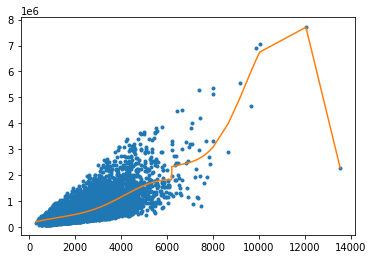

In [ ]:
plt.plot(poly_sales['power_1'],poly_sales['price'],'.',
         poly_sales['power_1'], model_small.predict(poly_sales),'-')

In [ ]:
model_small.coefficients[:2]

name,index,value,stderr
(intercept),None,146954.83736389806,176520.2297418725
power_1,None,193.6512204405194,572.7457053502787


In [ ]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.025896     | 2163371.458926     | 248665.441469                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

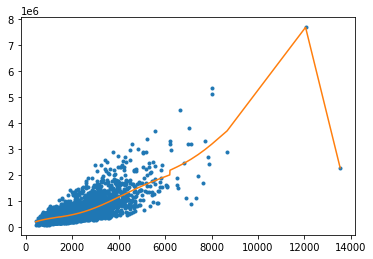

In [ ]:
poly15_data = polynomial_sframe(set_1['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_1['price'] # add price to the data since it's the target
model_set_1 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e-5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_1.predict(poly15_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.009466     | 1976898.111469     | 234347.353420                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

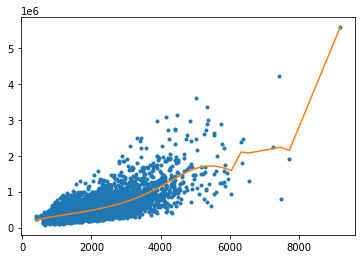

In [ ]:
poly15_data = polynomial_sframe(set_2['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_2['price'] # add price to the data since it's the target
model_set_2 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e-5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_2.predict(poly15_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.023630     | 2122855.230292     | 250215.819587                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

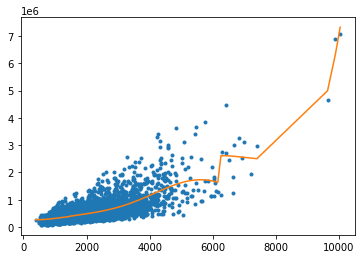

In [ ]:
poly15_data = polynomial_sframe(set_3['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_3['price'] # add price to the data since it's the target
model_set_3 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e-5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_3.predict(poly15_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.014655     | 2382492.578853     | 244333.497114                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

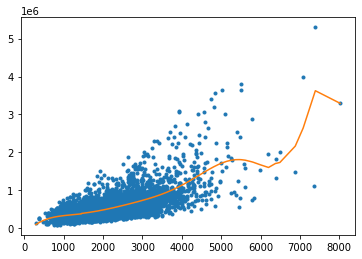

In [ ]:
poly15_data = polynomial_sframe(set_4['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_4['price'] # add price to the data since it's the target
model_set_4 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e-5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_4.predict(poly15_data),'-')

In [ ]:
print(model_set_1.coefficients[1])
print(model_set_2.coefficients[1])
print(model_set_3.coefficients[1])
print(model_set_4.coefficients[1])

{'name': 'power_1', 'index': None, 'value': 529.2726013464928, 'stderr': 1133.0858688302512}
{'name': 'power_1', 'index': None, 'value': 468.53115157056993, 'stderr': 2395.2897944798733}
{'name': 'power_1', 'index': None, 'value': -270.38337255316463, 'stderr': 1858.5814955858377}
{'name': 'power_1', 'index': None, 'value': 1366.854514905977, 'stderr': 3196.6675171951483}


Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.026658     | 6163831.995694     | 374179.152237                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

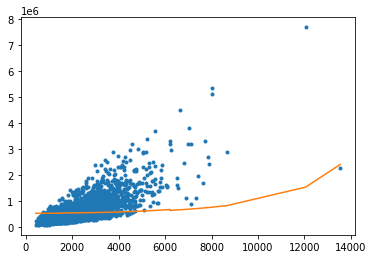

In [ ]:
poly15_data = polynomial_sframe(set_1['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_1['price'] # add price to the data since it's the target
model_set_1 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_1.predict(poly15_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.032309     | 3207348.164674     | 323472.905660                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

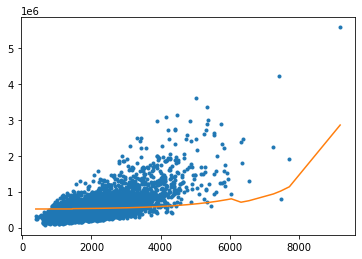

In [ ]:
poly15_data = polynomial_sframe(set_2['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_2['price'] # add price to the data since it's the target
model_set_2 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_2.predict(poly15_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.044014     | 3890401.464711     | 351873.627370                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

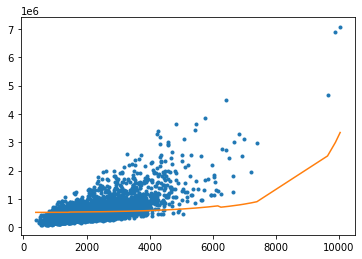

In [ ]:
poly15_data = polynomial_sframe(set_3['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_3['price'] # add price to the data since it's the target
model_set_3 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_3.predict(poly15_data),'-')

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.025429     | 3870944.319743     | 323871.651477                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

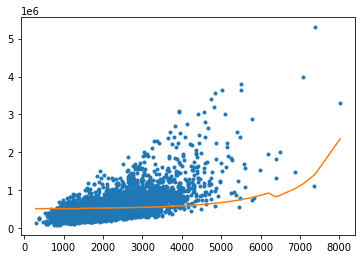

In [ ]:
poly15_data = polynomial_sframe(set_4['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = set_4['price'] # add price to the data since it's the target
model_set_4 =  tc.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None,l2_penalty=1e5)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model_set_4.predict(poly15_data),'-')

In [ ]:
print(model_set_1.coefficients[1])
print(model_set_2.coefficients[1])
print(model_set_3.coefficients[1])
print(model_set_4.coefficients[1])

{'name': 'power_1', 'index': None, 'value': 2.5822981177364746, 'stderr': 1705.0101827835613}
{'name': 'power_1', 'index': None, 'value': 2.043916330368709, 'stderr': 3306.2517601032932}
{'name': 'power_1', 'index': None, 'value': 2.2789812849461915, 'stderr': 2613.6869111391106}
{'name': 'power_1', 'index': None, 'value': 1.9174964029177968, 'stderr': 4237.282240242242}


In [ ]:
!pip install -e git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation

Obtaining turicreate_cross_validation from git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation
  Cloning https://github.com/Kagandi/turicreate-cross-validation.git to ./src/turicreate-cross-validation
  Running command git clone -q https://github.com/Kagandi/turicreate-cross-validation.git /content/src/turicreate-cross-validation
  Running setup.py develop for turicreate-cross-validation


In [ ]:
import turicreate_cross_validation.cross_validation as tcv

(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = tcv.shuffle_sframe(train_valid, random_seed=1)

In [ ]:
n = len(train_valid_shuffled)
k = 10 

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print(i, (int(start), int(end)))

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [ ]:
validation4 = train_valid_shuffled[5818:7757]
print(int(round(validation4['price'].mean(), 0)))

559642


In [ ]:
first = train_valid_shuffled[:5818]
last = train_valid_shuffled[7758:]
train4 = first.append(last)
print(int(round(train4['price'].mean(), 0)))

536866


In [ ]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
  val_error_sum = 0
  for i in range(k):
    n = len(data)
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    validation = data[start:end]
    train = data[:start].append(data[end+1:])
    model = tc.linear_regression.create(train,features = features_list,target = output_name,l2_penalty=l2_penalty,validation_set=None,verbose=False)
    pred = model.predict(validation)
    res = pred - validation[output_name]
    rss = (res*res).sum()
    val_error_sum += rss

  return (val_error_sum/k)



In [ ]:
train_valid_shuffled
data = polynomial_sframe(train_valid_shuffled['sqft_living'],15)
features = data.column_names()
data['price'] = train_valid_shuffled['price']

In [ ]:
import numpy as np
error_list = [[]]
for l2_penalty in np.logspace(1, 7, num=13):
  error = k_fold_cross_validation(10, l2_penalty, data, 'price', features)
  error_list.append([l2_penalty,error])



In [ ]:
error_list

[[],
 [10.0, 636925850454241.8],
 [31.622776601683793, 317823180475594.2],
 [100.0, 170520811125585.94],
 [316.22776601683796, 126569685561976.47],
 [1000.0, 120899881991060.97],
 [3162.2776601683795, 124627944244925.67],
 [10000.0, 135405895316438.0],
 [31622.776601683792, 173240712361282.9],
 [100000.0, 231430263222361.25],
 [316227.7660168379, 253007651533956.75],
 [1000000.0, 258846220911014.4],
 [3162277.6601683795, 262971439521880.1],
 [10000000.0, 264952048630331.7]]

In [ ]:
best_model = tc.linear_regression.create(data, target='price',features = features, l2_penalty = 1000,validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 19396

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.076967     | 2308802.153087     | 248835.078179                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
test_poly = polynomial_sframe(test['sqft_living'],15)

pred = best_model.predict(test_poly)
res = pred - test['price']
print((res*res).sum())

128091529428156.47


## Week 4-2

In [7]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [8]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix,weights)

    return(predictions)

In [ ]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if (feature_is_constant):
      derivative = 2*np.dot(errors,feature)
    else:
      derivative = 2*np.dot(errors,feature) + 2*l2_penalty*weight
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    
    return derivative

In [ ]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20)
print('')

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2)

-56554166815950.0
-56554166815950.0

-22446749330.0
-22446749330.0


In [ ]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    
    while (iteration<max_iterations):
        iteration += 1  # increment iteration counter
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        ### === end code section ===
        
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix,weights)
        # compute the errors as predictions - output
        errors = predictions - output
        # from time to time, print the value of the cost function
        if (iteration%print_frequency==0):
            print('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            der = feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,(i==0))
            #(Remember: when i=0, you are computing the derivative of the constant!)

            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size*der
    print('Done with gradient descent at iteration ', iteration)
    print('Learned weights = ', str(weights))
    return weights

In [ ]:
simple_features = ['sqft_living']
my_output = 'price'
train_data,test_data = sales.random_split(.8,seed=0)
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [ ]:
l2_penalty=0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7358805955106225.0
Iteration = 2
Cost function =  5326494317757331.0
Iteration = 3
Cost function =  3960270940247094.0
Iteration = 4
Cost function =  3041826011348107.0
Iteration = 5
Cost function =  2424400558590709.5
Iteration = 6
Cost function =  2009335727023514.0
Iteration = 7
Cost function =  1730308010175180.5
Iteration = 8
Cost function =  1542731369490711.5
Iteration = 9
Cost function =  1416632799322608.8
Iteration = 10
Cost function =  1331862918908173.0
Iteration = 20
Cost function =  1161267698060562.5
Iteration = 30
Cost function =  1158051957495986.5
Iteration = 40
Cost function =  1157991339955517.0
Iteration = 50
Cost function =  1157990196857675.8
Iteration = 60
Cost function =  1157990174860121.0
Iteration = 70
Cost function =  1157990173995439.5
Iteration = 80
Cost function =  1157990173529115.2
Iteration = 90
Cost function =  1157990173070300.2
Iteration = 100
Cost function =  1157990172

In [ ]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7358805955106225.0
Iteration = 2
Cost function =  5549836387061131.0
Iteration = 3
Cost function =  4854672287119624.0
Iteration = 4
Cost function =  4587529489387808.0
Iteration = 5
Cost function =  4484869844586825.0
Iteration = 6
Cost function =  4445418987428879.0
Iteration = 7
Cost function =  4430258464959390.0
Iteration = 8
Cost function =  4424432409757485.0
Iteration = 9
Cost function =  4422193471830293.5
Iteration = 10
Cost function =  4421333017535184.0
Iteration = 20
Cost function =  4420795119879108.0
Iteration = 30
Cost function =  4420794126009317.0
Iteration = 40
Cost function =  4420793169849955.0
Iteration = 50
Cost function =  4420792213693642.0
Iteration = 60
Cost function =  4420791257537731.5
Iteration = 70
Cost function =  4420790301382222.5
Iteration = 80
Cost function =  4420789345227114.0
Iteration = 90
Cost function =  4420788389072407.0
Iteration = 100
Cost function = 

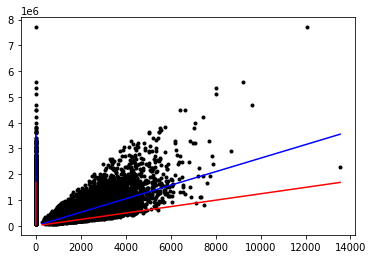

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [ ]:
pred1 = predict_output(simple_test_feature_matrix,initial_weights)
pred2 = predict_output(simple_test_feature_matrix,simple_weights_0_penalty)
pred3 = predict_output(simple_test_feature_matrix,simple_weights_high_penalty)


In [ ]:
def print_rss(pred):
  res = pred - test_output
  print((res*res).sum())

In [ ]:
print_rss(pred1)
print_rss(pred2)
print_rss(pred3)

1858519183365845.0
326034456885201.3
760143508722076.8


In [ ]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [ ]:
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7358805955106225.0
Iteration = 2
Cost function =  3984938660046042.0
Iteration = 3
Cost function =  2461843184346348.0
Iteration = 4
Cost function =  1774063673953559.0
Iteration = 5
Cost function =  1463292827184894.2
Iteration = 6
Cost function =  1322682055389040.5
Iteration = 7
Cost function =  1258874017927509.2
Iteration = 8
Cost function =  1229733554135088.5
Iteration = 9
Cost function =  1216243689131774.0
Iteration = 10
Cost function =  1209821414925359.2
Iteration = 20
Cost function =  1199284858236843.8
Iteration = 30
Cost function =  1194166431717389.5
Iteration = 40
Cost function =  1189621745077096.0
Iteration = 50
Cost function =  1185585166197819.0
Iteration = 60
Cost function =  1181999886835088.0
Iteration = 70
Cost function =  1178815450569939.8
Iteration = 80
Cost function =  1175987042137887.5
Iteration = 90
Cost function =  1173474856733508.0
Iteration = 100
Cost function =  1171243539

In [ ]:
l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7358805955106225.0
Iteration = 2
Cost function =  4388543555542663.0
Iteration = 3
Cost function =  3727095207964607.0
Iteration = 4
Cost function =  3579695949862447.0
Iteration = 5
Cost function =  3546785235632549.0
Iteration = 6
Cost function =  3539396869174677.0
Iteration = 7
Cost function =  3537712920995392.5
Iteration = 8
Cost function =  3537313300643799.5
Iteration = 9
Cost function =  3537208714897501.5
Iteration = 10
Cost function =  3537175565928069.0
Iteration = 20
Cost function =  3537144300958945.5
Iteration = 30
Cost function =  3537143590492267.5
Iteration = 40
Cost function =  3537143132772719.0
Iteration = 50
Cost function =  3537142677565617.5
Iteration = 60
Cost function =  3537142222383633.0
Iteration = 70
Cost function =  3537141767202040.0
Iteration = 80
Cost function =  3537141312020594.0
Iteration = 90
Cost function =  3537140856839291.5
Iteration = 100
Cost function = 

In [ ]:
pred1 = predict_output(test_feature_matrix,initial_weights)
pred2 = predict_output(test_feature_matrix,multiple_weights_0_penalty)
pred3 = predict_output(test_feature_matrix,multiple_weights_high_penalty)

In [ ]:
print_rss(pred1)
print_rss(pred2)
print_rss(pred3)

1858519183365845.0
326226541555530.7
569592117172765.8


In [ ]:
pred2[0]

161467.5133850756

In [ ]:
pred3[0]

178795.0190468094

In [ ]:
test_data[0]

{'bathrooms': 0.75,
 'bedrooms': 1,
 'condition': 3,
 'constant': 1,
 'date': '20150219T000000',
 'floors': 1.0,
 'grade': 4,
 'id': 8655900162,
 'lat': 47.6554,
 'long': -121.908,
 'price': 156000.0,
 'sqft_above': 470,
 'sqft_basement': 0,
 'sqft_living': 470,
 'sqft_living15': 1730,
 'sqft_lot': 15000,
 'sqft_lot15': 22500,
 'view': 0,
 'waterfront': 0,
 'yr_built': 1947,
 'yr_renovated': 0,
 'zipcode': 98014}

## Week 5 - 1

In [ ]:
import turicreate as tc
from math import log, sqrt

sales = tc.SFrame('kc_house_data.csv')

sales['sqft_living_sqrt'] = sales['sqft_living'].apply(sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(sqrt)
sales['bedrooms_square'] = sales['bedrooms']*sales['bedrooms']

# In the dataset, 'floors' was defined with type string, 
# so we'll convert them to float, before creating a new feature.
sales['floors'] = sales['floors'].astype(float) 
sales['floors_square'] = sales['floors']*sales['floors']

Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.179879 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.121599 secs.

In [ ]:
all_features = ['bedrooms', 'bedrooms_square',
                'bathrooms',
                'sqft_living', 'sqft_living_sqrt',
                'sqft_lot', 'sqft_lot_sqrt',
                'floors', 'floors_square',
                'waterfront', 'view', 'condition', 'grade',
                'sqft_above',
                'sqft_basement',
                'yr_built', 'yr_renovated']

In [ ]:
model_all = tc.linear_regression.create(sales, target='price', features=all_features,
                                                validation_set=None, 
                                                l2_penalty=0., l1_penalty=1e10)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 17

Number of unpacked features : 17

Number of coefficients    : 18

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 1.000000  | 0.042537     | 7700000.000000     | 653047.734168                   |

| 1         | 2        | 0.000002  | 0.500607     | 6962915.603072     | 426631.749109                   |

| 2         | 3        | 0.000002  | 0.543056     | 6843144.199650     | 392488.929912                   |

| 3         | 4        | 0.000002  | 0.589568     | 6831900.031762     | 385340.166899                   |

| 4         | 5        | 0.000002  | 0.633501     | 6847166.848494     | 384842.383879                   |

| 5         | 6        | 0.000002  | 0.677348     | 6869667.894269     | 385998.458664                   |

| 10        | 11       | 0.000002  | 0.891631     | 6842123.230167     | 364204.576307                   |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [ ]:
model_all.coefficients[model_all.coefficients['value']!=0]

name,index,value,stderr
(intercept),None,274873.05565166846,None
bathrooms,None,8468.531052082433,None
sqft_living,None,24.4207211037497,None
sqft_living_sqrt,None,350.06055100460185,None
grade,None,842.0680288184716,None
sqft_above,None,20.024722643562534,None


In [ ]:
(training_and_validation, testing) = sales.random_split(.9,seed=1) # initial train/test split
(training, validation) = training_and_validation.random_split(0.5, seed=1) # split training into train and validate

In [ ]:
rss_list = []
for l1_penalty in np.logspace(1, 7, num=13):
  model = tc.linear_regression.create(training, target='price', features=all_features,
                                                validation_set=None, 
                                                l2_penalty=0., l1_penalty=l1_penalty,verbose=False)
  pred = model.predict(validation)
  res = pred - validation['price']
  rss = (res*res).sum()
  rss_list.append([l1_penalty,rss])


In [ ]:
rss_list[1]

[31.622776601683793, 625766294877670.0]

In [ ]:
model = tc.linear_regression.create(training, target='price', features=all_features,
                                                validation_set=None, 
                                                l2_penalty=0., l1_penalty=rss_list[1][0],verbose=False)

In [ ]:
model.coefficients[model.coefficients['value']!=0]

name,index,value,stderr
(intercept),None,18993.427715561997,None
bedrooms,None,7936.967475292288,None
bedrooms_square,None,936.993344231896,None
bathrooms,None,25409.588988964355,None
sqft_living,None,39.1151369400539,None
sqft_living_sqrt,None,1124.6502115880273,None
sqft_lot,None,0.003483611854549601,None
sqft_lot_sqrt,None,148.2583934262737,None
floors,None,21204.335204990635,None
floors_square,None,12915.524341434717,None


In [ ]:
max_nonzeros = 7
nz_list = []
for l1_penalty in np.logspace(8, 10, num=20):
  model = tc.linear_regression.create(training, target='price', features=all_features,
                                                validation_set=None, 
                                                l2_penalty=0., l1_penalty=l1_penalty,verbose=False)
  nz_list.append([l1_penalty,model.coefficients['value'].nnz()])

In [ ]:
nz_list

[[100000000.0, 18],
 [127427498.57031322, 18],
 [162377673.91887242, 18],
 [206913808.111479, 18],
 [263665089.87303555, 17],
 [335981828.6283788, 17],
 [428133239.8719396, 17],
 [545559478.1168514, 17],
 [695192796.1775591, 17],
 [885866790.4100832, 16],
 [1128837891.6846883, 15],
 [1438449888.2876658, 15],
 [1832980710.8324375, 13],
 [2335721469.0901213, 12],
 [2976351441.6313133, 10],
 [3792690190.7322536, 6],
 [4832930238.571753, 5],
 [6158482110.6602545, 3],
 [7847599703.514623, 1],
 [10000000000.0, 1]]

In [ ]:
l1_penalty_min = nz_list[14][0]
l1_penalty_max = nz_list[15][0]

In [ ]:
l1_penalty_max

3792690190.7322536

In [ ]:
lowest_rss = 99999999999999999999999999999999
best_model
best_pen = 0
for l1_penalty in np.linspace(l1_penalty_min,l1_penalty_max,20):
  model = tc.linear_regression.create(training, target='price', features=all_features,
                                                validation_set=None, 
                                                l2_penalty=0., l1_penalty=l1_penalty,verbose=False)
  pred = model.predict(validation)
  res = pred - validation['price']
  rss = (res*res).sum()
  if (rss<lowest_rss and model.coefficients['value'].nnz()==max_nonzeros):
    best_model = model
    best_pen = l1_penalty


In [ ]:
best_pen

3577864204.126743

In [ ]:
best_model.coefficients[best_model.coefficients['value']!=0]

name,index,value,stderr
(intercept),None,229077.87470979945,None
bedrooms,None,149.417363536915,None
bathrooms,None,15146.739428185308,None
sqft_living,None,31.758638448581056,None
sqft_living_sqrt,None,655.0782521921776,None
grade,None,2670.2506505467577,None
sqft_above,None,29.0979670442239,None


## Week 5 - 2

In [6]:
import turicreate as tc
import numpy as np

In [5]:
sales = tc.SFrame('kc_house_data.csv')
# In the dataset, 'floors' was defined with type string, 
# so we'll convert them to float and then to int, before using it below
sales['floors'] = sales['floors'].astype(float).astype(int)

Read 100 lines. Lines per second: 607.168

Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.165831 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.10914 secs.

In [13]:
def normalize_features(feature_matrix):
  norms = np.linalg.norm(feature_matrix,axis=0)
  normalized_features = feature_matrix/norms

  return (normalized_features, norms)

In [14]:
features, norms = normalize_features(np.array([[3.,6.,9.],[4.,8.,12.]]))
print(features)
# should print
# [[ 0.6  0.6  0.6]
#  [ 0.8  0.8  0.8]]
print(norms)
# should print
# [5.  10.  15.]

[[0.6 0.6 0.6]
 [0.8 0.8 0.8]]
[ 5. 10. 15.]


In [15]:
simple_features = ['sqft_living', 'bedrooms']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(sales, simple_features, my_output)
simple_feature_matrix, norms = normalize_features(simple_feature_matrix)
weights = np.array([1., 4., 1.])
prediction = predict_output(simple_feature_matrix,weights)


In [17]:
r_all = []
for i in range(len(weights)):
  r = np.dot(simple_feature_matrix[:,i],(output-prediction+weights[i]*simple_feature_matrix[:,i]))
  r_all.append(r)

In [18]:
r_all

[79400300.01452288, 87939470.82325178, 80966698.66623947]

In [19]:
def lasso_coordinate_descent_step(i, feature_matrix, output, weights, l1_penalty):
    # compute prediction
    prediction = predict_output(feature_matrix,weights)
    # compute ro[i] = SUM[ [feature_i]*(output - prediction + weight[i]*[feature_i]) ]
    ro_i = np.dot(feature_matrix[:,i],(output-prediction+weights[i]*feature_matrix[:,i]))

    if i == 0: # intercept -- do not regularize
        new_weight_i = ro_i 
    elif ro_i < -l1_penalty/2.:
        new_weight_i = ro_i + l1_penalty/2
    elif ro_i > l1_penalty/2.:
        new_weight_i = ro_i - l1_penalty/2
    else:
        new_weight_i = 0.
    
    return new_weight_i

In [20]:
# should print 0.425558846691
import math
print(lasso_coordinate_descent_step(1, np.array([[3./math.sqrt(13),1./math.sqrt(10)],[2./math.sqrt(13),3./math.sqrt(10)]]), 
                                    np.array([1., 1.]), np.array([1., 4.]), 0.1))

0.42555884669102517


In [32]:
def lasso_cyclical_coordinate_descent(feature_matrix, output, initial_weights, l1_penalty, tolerance):
  max_change = tolerance+1
  weights = initial_weights
  while(max_change>tolerance):
    
    max_change = 0
    for i in range(len(initial_weights)):
      new_weight = lasso_coordinate_descent_step(i,feature_matrix,output,weights,l1_penalty)
      change = abs(weights[i]-new_weight)
      weights[i] = new_weight
      
      if (change>max_change):
        max_change = change

  return(weights)


In [33]:
simple_features = ['sqft_living', 'bedrooms']
my_output = 'price'
initial_weights = np.zeros(3)
l1_penalty = 1e7
tolerance = 1.0
(simple_feature_matrix, output) = get_numpy_data(sales, simple_features, my_output)
(normalized_simple_feature_matrix, simple_norms) = normalize_features(simple_feature_matrix) # normalize features
weights = lasso_cyclical_coordinate_descent(normalized_simple_feature_matrix, output,
                                            initial_weights, l1_penalty, tolerance)

In [34]:
print(weights)

[21624997.95951913 63157247.20788954        0.        ]


In [35]:
pred = predict_output(normalized_simple_feature_matrix,weights)
res = pred - output
print((res*res).sum())

1630492476715387.0


In [36]:
train_data,test_data = sales.random_split(.8,seed=0)
all_features = ['bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'floors',
                'waterfront', 
                'view', 
                'condition', 
                'grade',
                'sqft_above',
                'sqft_basement',
                'yr_built', 
                'yr_renovated']

In [69]:
(all_feature_matrix, output) = get_numpy_data(train_data, all_features, 'price')
(normalized_all_feature_matrix, all_norms) = normalize_features(all_feature_matrix) # normalize features

In [70]:
initial_weights = np.zeros(len(all_features)+1)
print(initial_weights)
tolerance = 1
l1_penalty = 1e7
weights_1e7 = lasso_cyclical_coordinate_descent(normalized_all_feature_matrix, output,
                                            initial_weights, l1_penalty, tolerance)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [66]:
for i in range(len(all_features)):
  print(all_features[i]+': '+ str(weights_1e7[i+1]))


bedrooms: 0.0
bathrooms: 0.0
sqft_living: 48389174.77154893
sqft_lot: 0.0
floors: 0.0
waterfront: 3317511.2149216533
view: 7329961.811714258
condition: 0.0
grade: 0.0
sqft_above: 0.0
sqft_basement: 0.0
yr_built: 0.0
yr_renovated: 0.0


In [71]:
l1_penalty=1e8
initial_weights = np.zeros(len(all_features)+1)
tolerance = 1
weights_1e8 = lasso_cyclical_coordinate_descent(normalized_all_feature_matrix, output,
                                            initial_weights, l1_penalty, tolerance)

In [67]:
for i in range(len(all_features)):
  print(all_features[i]+': '+ str(weights_1e8[i+1]))

bedrooms: 0.0
bathrooms: 0.0
sqft_living: 0.0
sqft_lot: 0.0
floors: 0.0
waterfront: 0.0
view: 0.0
condition: 0.0
grade: 0.0
sqft_above: 0.0
sqft_basement: 0.0
yr_built: 0.0
yr_renovated: 0.0


In [74]:
l1_penalty=1e4
initial_weights = np.zeros(len(all_features)+1)
tolerance=5e5
weights_1e4 = lasso_cyclical_coordinate_descent(normalized_all_feature_matrix, output,
                                            initial_weights, l1_penalty, tolerance)

In [75]:
for i in range(len(all_features)):
  print(all_features[i]+': '+ str(weights_1e4[i+1]))

bedrooms: -22884012.04816603
bathrooms: 15348487.134043012
sqft_living: 92166870.02043463
sqft_lot: -2139328.025153204
floors: -8818455.593524072
waterfront: 6494209.781447974
view: 7065161.893966012
condition: 4119078.539168925
grade: 18436484.48594148
sqft_above: -14566678.744584221
sqft_basement: -5528348.927595556
yr_built: -83591746.61914322
yr_renovated: 2784276.548850721


In [76]:
weights1e4_norm = weights_1e4/all_norms
weights1e7_norm = weights_1e7/all_norms
weights1e8_norm = weights_1e8/all_norms

In [77]:
print(weights1e7_norm[3])

161.3174576461175


In [78]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, all_features, 'price')

In [79]:
pred1 = predict_output(test_feature_matrix,weights1e4_norm)
res1 = (pred1-test_output)
print((res1*res1).sum())
pred2 = predict_output(test_feature_matrix,weights1e7_norm)
res2 = (pred2-test_output)
print((res2*res2).sum())
pred3 = predict_output(test_feature_matrix,weights1e8_norm)
res3 = (pred3-test_output)
print((res3*res3).sum())

227781001424651.94
275962075920366.84
537166151497322.75


## Week 6

In [97]:
sales = tc.SFrame('kc_house_data.csv')

Read 100 lines. Lines per second: 466.116

Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.22087 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.1362 secs.

In [108]:
(train_and_validation, test) = sales.random_split(.8, seed=1) # initial train/test split
(train, validation) = train_and_validation.random_split(.8, seed=1)
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [109]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms
features_valid = features_valid / norms # normalize validation set by training set norms

In [110]:
features_test[0]

array([ 0.00850979,  0.00732466,  0.00377192,  0.00666177,  0.00145774,
        0.00535787,  0.        ,  0.        ,  0.00733742,  0.00768814,
        0.00454217,  0.01166471,  0.00846092,  0.        ,  0.00850116,
       -0.00851831,  0.00721359,  0.00229411])

In [101]:
features_train[9]

array([ 0.00850979,  0.00732466,  0.00660085,  0.00512732,  0.00188902,
        0.00535787,  0.        ,  0.        ,  0.00978323,  0.00768814,
        0.00592645,  0.        ,  0.0085343 ,  0.        ,  0.00851912,
       -0.00849797,  0.00555204,  0.00288651])

In [102]:
np.sqrt(np.sum((features_test[0] - features_train[9])**2))

0.012554872954548744

In [103]:
for x in features_train[0:10]:
  print(np.sqrt(sum((features_test[0] - x)**2)))

0.012050533235123895
0.04280162009367137
0.013181777579673504
0.009971445246319472
0.012614720108234046
0.0434616390068102
0.014105182842233081
0.01214737470038522
0.012697609405169083
0.012554872954548746


In [111]:
diff = features_train[:] - features_test[0]

print(diff[-1].sum())

-0.003421492107796808
